In [1]:
# Auhtor:       Piotr Artman
# StudentID:    C00220223
# Subject:      Data Science and Machine Learning 1
# Project:      Analysis of trends for gold price

# DESCLAIMER:   This notebook is not financial advice. 
#               My work is focused on the use of available 
#               technological capabilities to conduct gold price analysis.

# WARNING:      WORK IN PROGRESS
# 
# Work plan:    1. Download bullion gold prices from NASDAQ.    https://data.nasdaq.com          DONE
#               2. Download data from ECB                       https://data.ecb.europa.eu
#               3. Download data from FED                       https://fred.stlouisfed.org
#               4. Download data from OECD                      https://data.oecd.org
#               5. Download data from EU.                       https://data.europa.eu/en
#               6. download data from BIS                       https://www.bis.org
#               7. Download data from Frankfurt Stock Exchange                  
#               8. Import data from NASDAQ into memory 
#                  and calculate moving average and use it to predict price of gold bullion.
#               9. Import remaining data into memory
#                  and use random forest algorithm to improve predictions.  

In [12]:
# Step 1 - importing software components

import nasdaqdatalink
import sys
sys.path.append('../API_KEYS') 
from nasdaq_api_key import discrete_value
nasdaqdatalink.ApiConfig.api_key = discrete_value


from IPython.display import display

import matplotlib.pyplot as plt

In [13]:
# Step 2 - connecting do data from NASDAQ 

# import gold bullion price on London Bullion Market Association from Nasdq

gold_bullion_price = nasdaqdatalink.get('LBMA/GOLD')

In [14]:
# Step 3 check what is inside fetched data
display(gold_bullion_price)

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
1968-01-02,35.18,NaN,14.641,NaN,NaN,NaN
1968-01-03,35.16,NaN,14.617,NaN,NaN,NaN
1968-01-04,35.14,NaN,14.603,NaN,NaN,NaN
1968-01-05,35.14,NaN,14.597,NaN,NaN,NaN
1968-01-08,35.14,NaN,14.586,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-11-06,1987.10,1984.60,1600.410,1601.57,1848.20,1847.86
2023-11-07,1967.80,1960.70,1598.440,1594.44,1839.70,1836.39
2023-11-08,1960.10,1959.35,1599.640,1595.89,1837.99,1833.36


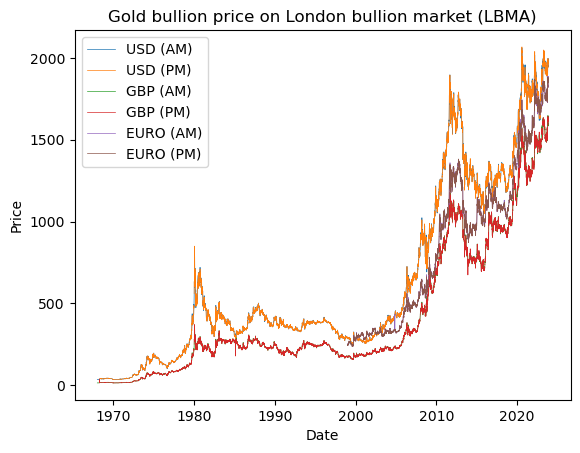

In [15]:


plt.plot(gold_bullion_price, linewidth=0.5, label=['USD (AM)','USD (PM)','GBP (AM)','GBP (PM)','EURO (AM)','EURO (PM)'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Gold bullion price on London bullion market (LBMA)")
plt.legend()
plt.show()

In [16]:
gold_bullion_price.to_csv('/home/DataScience/Project_1/Data/NASDAQdatalink/LBMA-GOLD.csv')

In [ ]:
# importing data from ECB

# code below is a test

# code for this found here: https://www.pythonsherpa.com/static/files/html/ECB%20-%20Open%20Data.html

import requests 
import pandas as pd
import io

In [ ]:
# Building blocks for the URL
entrypoint = 'https://sdw-wsrest.ecb.europa.eu/service/' # Using protocol 'https'
resource = 'data'           # The resource for data queries is always'data'
flowRef ='EXR'              # Dataflow describing the data that needs to be returned, exchange rates in this case
key = 'D.CHF.EUR.SP00.A'    # Defining the dimension values, explained below

# Define the parameters
parameters = {
    'startPeriod': '1998-01-01',  # Start date of the time series , ECB was established in 1998 
    'endPeriod': '2018-10-01'     # End of the time series
}

In [ ]:
# Construct the URL: https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D.CHF.EUR.SP00.A
request_url = entrypoint + resource + '/'+ flowRef + '/' + key

# Make the HTTP request
response = requests.get(request_url, params=parameters)

# Check if the response returns succesfully with response code 200
print(response)

# Print the full URL
print(response.url)

In [ ]:
# Print the first 1000 characters of the response
print(response.text[0:1000])

In [ ]:
# Make the HTTP request again, now requesting for CSV format
response = requests.get(request_url, params=parameters, headers={'Accept': 'text/csv'})
# Response succesful? (Response code 200)
print(response)

In [ ]:
response.text[0:1000]

In [ ]:
# Read the response as a file into a Pandas DataFrame
df = pd.read_csv(io.StringIO(response.text))

In [ ]:
# Check the DataFrame's information
df.info()

In [ ]:
# Show the last 5 entries of the DataFrame
df.tail()